In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.cm as cm


In [2]:
cmap = plt.cm.Blues
# Normalize the values to the range [0, 1]
# Assuming your range is from 0 to 100
norm = mcolors.Normalize(vmin=0, vmax=100)

# Function to get color from the colormap
def get_color(value):
    try:
        color = cmap(norm(value))
    except:
        color = 'white'
    return color

## Load up base dataframe

In [3]:
main_df = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/HGSOC_platinum_responce/HGSOC_TCGA_main.csv")


prots = ['RAB25', 'BCL2L1', 'HADH', 'NFKB2', 'COX7A2', 'COX7C', 'TPMT', 'GOLPH3L', 'LTA4H', 'COX6C', 'IDH1', 'YWHAG', 'S100A10', 'COX6A1', 'NDUFB3', 'TGM2', 'CDKN1B', 'NFKB1', 'CAMK2D', 'IL4I1', 'FDX1', 'VCAM1', 'ATM', 'NCAPH2', 'ABCB8', 'IDI1', 'PLIN2', 'ATP6V1D', 'GPX4', 'CA2', 'RELA', 'GLUD1', 'TOP3B', 'RPS6KB2', 'KEAP1', 'LGALS1', 'MTDH', 'AIFM1', 'RHOA', 'CASP7', 'PTGES2', 'TFRC', 'CHUK', 'GPX1', 'PDK1', 'STAT3', 'PECR', 'TALDO1', 'XIAP', 'ACADSB', 'CPOX', 'ARNT', 'BIRC2', 'ACOT7', 'HACL1', 'MYD88', 'EGFR', 'RIPK1', 'NBN', 'LDHA']
columns  = ['Sample Source','label','Proteomic subtype','Patient Age','Tumor type','Tumor Substage']

for prot in prots: 
    columns.append(prot)


# TODO: organise by pathway group... 


df = main_df[columns]
df['label'] = df['label'].map({1:'Sensitive', 0:'Refractory'})

print(len(df))
df_transposed = df.T

696


/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (5283,7094) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [4]:
# Define the custom order for the 'Sample Source' column
custom_order = ['FHCRC','Mayo','UAB',"TCGA"]

# Convert the 'Category' column to a categorical type with the specified order
df['Sample Source'] = pd.Categorical(df['Sample Source'], categories=custom_order, ordered=True)
df_sorted = df.sort_values(by=['Sample Source','label','Proteomic subtype']).reset_index(drop=True)

df_transposed = df_sorted.T

# # df_transposed_back = df_transposed.T.sort_values(by=['Sample Source','Tumor type','label','Proteomic subtype'])
# df_transposed_back = df_transposed_back.reset_index(drop=True)
# df_transposed = df_transposed_back.T 

df_transposed.head(10)

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,0,1,2,3,4,5,6,7,8,9,...,686,687,688,689,690,691,692,693,694,695
Sample Source,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,...,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA
label,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,...,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive
Proteomic subtype,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,...,Stromal,Stromal,Stromal,Stromal,NaN,NaN,NaN,NaN,NaN,NaN
Patient Age,72.0,64.0,64.0,64.0,61.0,61.0,52,48,52,52,...,57,72,72,72,62,62,62,62,71,71
Tumor type,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Metastatic,Metastatic,...,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary
Tumor Substage,IIIA,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIB,IIIC,IIIC,...,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC
RAB25,1.101361,1.101361,1.101361,1.101361,1.245962,1.245962,-0.56504,-0.56504,-0.56504,-0.56504,...,0.936791,-0.919932,-0.919932,-0.919932,-0.633289,-0.633289,-0.633289,-0.633289,1.029757,1.029757
BCL2L1,-0.78526,-0.78526,-0.78526,-0.78526,0.199966,0.199966,-0.917197,-0.917197,-0.917197,-0.917197,...,-1.898793,0.593074,0.593074,0.593074,-0.213504,-0.213504,-0.213504,-0.213504,0.501737,0.501737
HADH,1.484251,1.484251,1.484251,1.484251,1.935297,1.935297,0.968625,0.968625,0.968625,0.968625,...,0.197924,-2.106385,-2.106385,-2.106385,-0.057452,-0.057452,-0.057452,-0.057452,0.318164,0.318164
NFKB2,-0.659031,-0.659031,-0.659031,-0.659031,0.589006,0.589006,0.10454,0.10454,0.10454,0.10454,...,-0.45858,0.564114,0.564114,0.564114,1.583642,1.583642,1.583642,1.583642,-0.11308,-0.11308


In [5]:
row_to_check = 'Sample Source'

# Find the points where the value changes
values = df_transposed.loc[row_to_check]
# Initialize change_points with False for the first element
change_points = [False] 
# Then start comparing from the second element
change_points += [values[i] != values[i-1] for i in range(1, len(values))]

# Split the DataFrame into segments
segments = []
start_col = 0
for col, changed in enumerate(change_points, start=1):
    if changed or col == len(change_points):
        segments.append(df_transposed.iloc[:, start_col:col-1])
        start_col = col

# Insert three NaN columns between segments
nan_df = pd.DataFrame(np.nan, index=df_transposed.index, columns=['NaN1', 'NaN2', 'NaN3'])
new_segments = [segments[0]]
for segment in segments[1:]:
    new_segments.extend([nan_df, segment])

# Concatenate the segments back into a DataFrame
df_transposed = pd.concat(new_segments, axis=1)

df_transposed_back = df_transposed.T.reset_index(drop=True)
df_transposed = df_transposed_back.T 

In [6]:
df_transposed.head(10)

,0,1,2,3,4,5,6,7,8,9,...,691,692,693,694,695,696,697,698,699,700
Sample Source,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,FHCRC,...,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA,TCGA
label,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,Refractory,...,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive,Sensitive
Proteomic subtype,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,Differentiated,...,Stromal,Stromal,Stromal,Stromal,Stromal,NaN,NaN,NaN,NaN,NaN
Patient Age,72.0,64.0,64.0,64.0,61.0,61.0,52,48,52,52,...,57,57,72,72,72,62,62,62,62,71
Tumor type,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Metastatic,Metastatic,...,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary
Tumor Substage,IIIA,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIB,IIIC,IIIC,...,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC,IIIC
RAB25,1.101361,1.101361,1.101361,1.101361,1.245962,1.245962,-0.56504,-0.56504,-0.56504,-0.56504,...,0.936791,0.936791,-0.919932,-0.919932,-0.919932,-0.633289,-0.633289,-0.633289,-0.633289,1.029757
BCL2L1,-0.78526,-0.78526,-0.78526,-0.78526,0.199966,0.199966,-0.917197,-0.917197,-0.917197,-0.917197,...,-1.898793,-1.898793,0.593074,0.593074,0.593074,-0.213504,-0.213504,-0.213504,-0.213504,0.501737
HADH,1.484251,1.484251,1.484251,1.484251,1.935297,1.935297,0.968625,0.968625,0.968625,0.968625,...,0.197924,0.197924,-2.106385,-2.106385,-2.106385,-0.057452,-0.057452,-0.057452,-0.057452,0.318164
NFKB2,-0.659031,-0.659031,-0.659031,-0.659031,0.589006,0.589006,0.10454,0.10454,0.10454,0.10454,...,-0.45858,-0.45858,0.564114,0.564114,0.564114,1.583642,1.583642,1.583642,1.583642,-0.11308


### Plot to show datasets

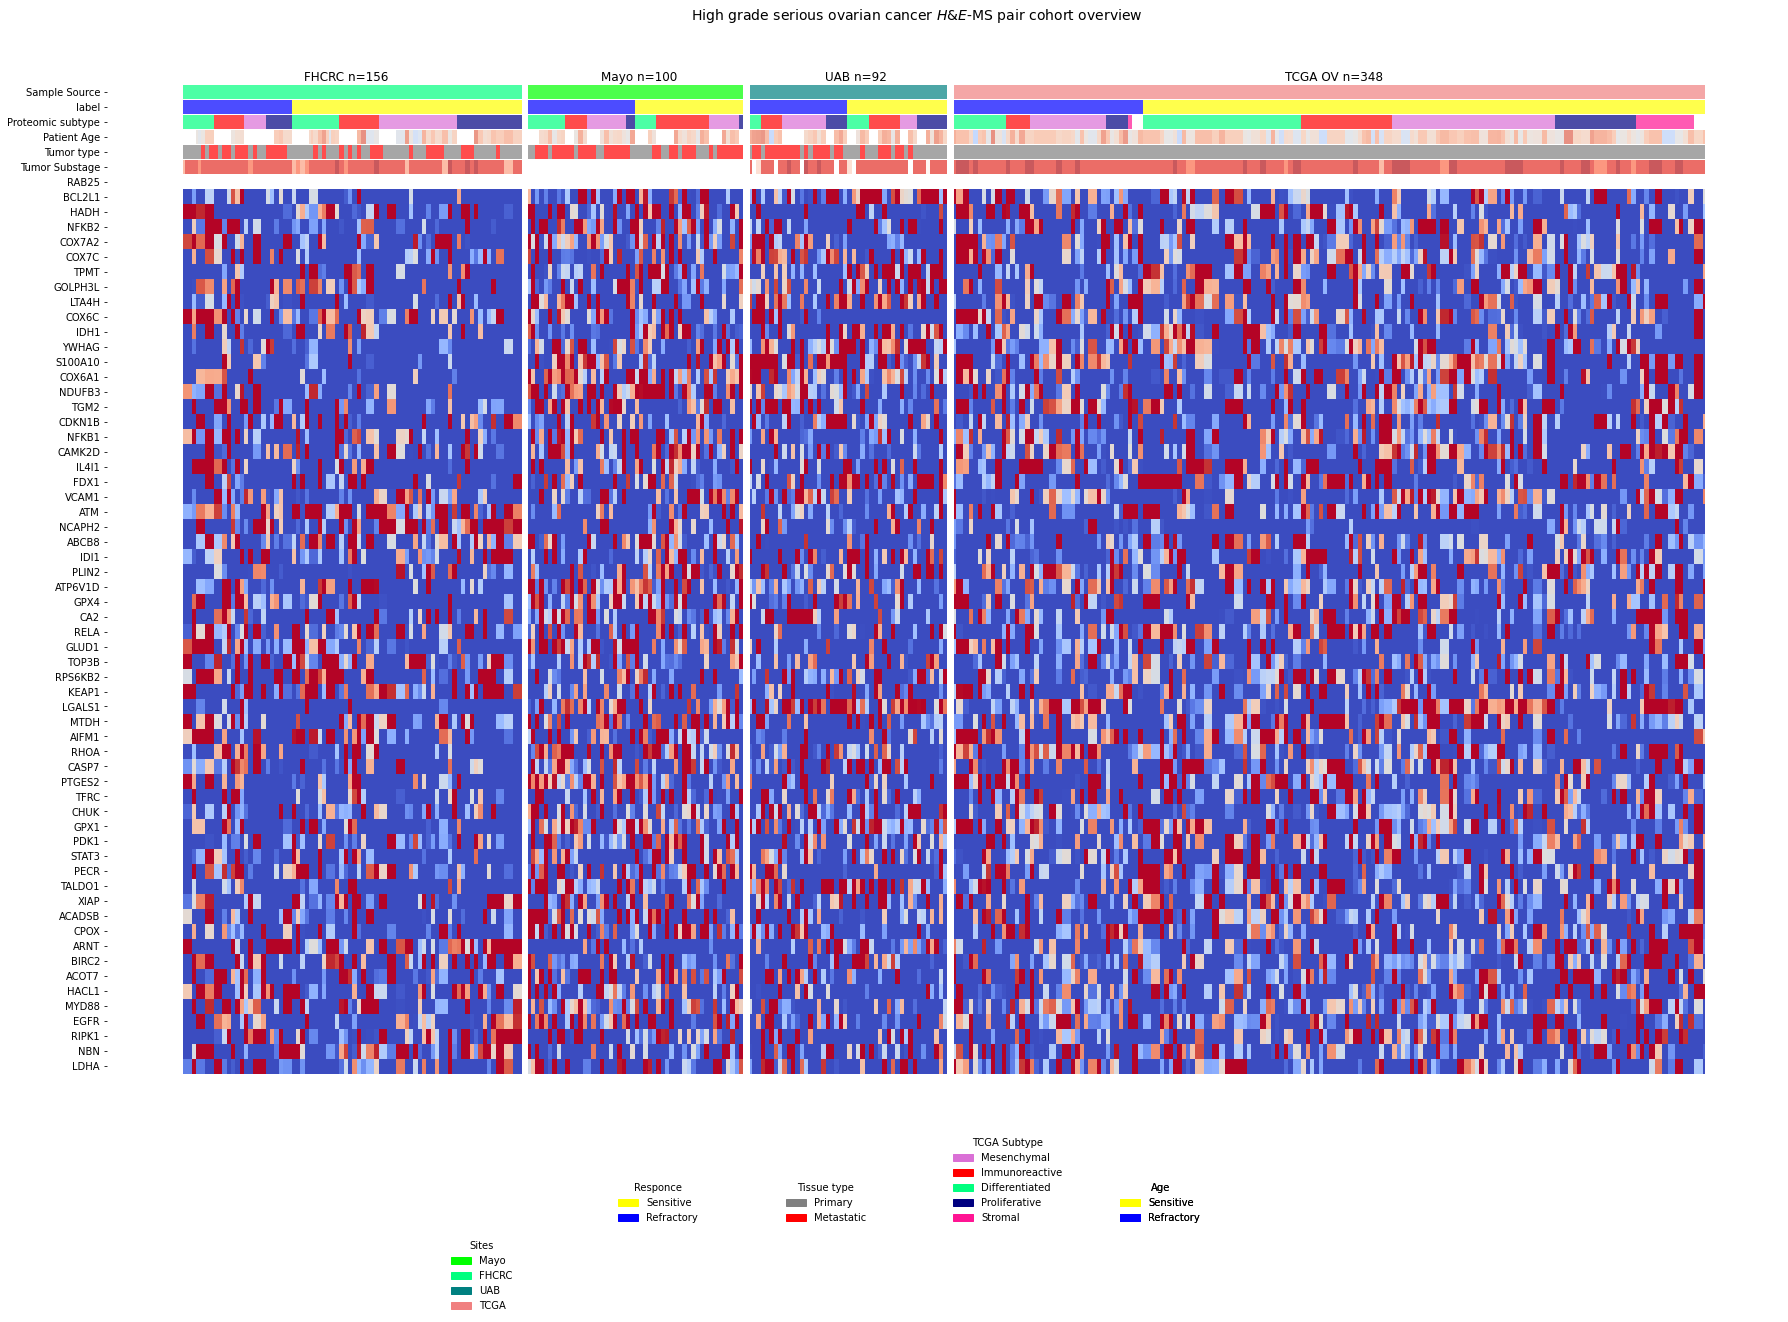

In [11]:
plt.figure(figsize=(30, 20))

# Loop through categories and patients to color the squares
responce_colors = {'Sensitive': 'yellow', 'Refractory': 'blue'}
subtype_colors = {'Mesenchymal': 'orchid', 'Immunoreactive':'red', 'Differentiated':'springgreen','Proliferative':'navy','Stromal':'deeppink'}
type_colors = {'Primary': 'grey', 'Metastatic': 'red'}
site_colors = {'Mayo':'lime', 'FHCRC':'springgreen','UAB':'teal','TCGA':'lightcoral'}
stage_colors = {
    'IA': (1.0, 0.9607843137254902, 0.9411764705882353, 1.0),
    'IB': (1.0, 0.9607843137254902, 0.9411764705882353, 1.0),
    'IC': (1.0, 0.9607843137254902, 0.9411764705882353, 1.0),
    'IIA': (0.9935870818915802, 0.8323414071510957, 0.7624913494809689, 1.0),
    'IIB': (0.9935870818915802, 0.8323414071510957, 0.7624913494809689, 1.0),
    'IIC': (0.9935870818915802, 0.8323414071510957, 0.7624913494809689, 1.0),
    'IIIA': (0.9882352941176471, 0.6261437908496732, 0.5084967320261438, 1.0),
    'IIIB': (0.9843752402921953, 0.4181468665897732, 0.2926566705113418, 1.0),
    'IIIC': (0.8901960784313725, 0.18562091503267975, 0.15294117647058825, 1.0),
    'IV': (0.6990695886197618, 0.07114186851211075, 0.09330257593233374, 1.0),
    'IVA': (0.6990695886197618, 0.07114186851211075, 0.09330257593233374, 1.0),
    'IVB': (0.6990695886197618, 0.07114186851211075, 0.09330257593233374, 1.0)

}


color_list = [site_colors,responce_colors,subtype_colors,'continuous',type_colors,stage_colors]

gap = 0.1
for i, category in enumerate(df_transposed.index[0:6]):
    for j in range(len(df_transposed.columns)):
        if not pd.isna(df_transposed.loc[category,j]):
            colors = color_list[i]
            if colors == 'continuous':
                color = get_color(df_transposed.loc[category,j])
            else:
                color = colors[df_transposed.loc[category,j]] # needs to be for each part ....
            plt.fill_between([j, j+1], i + gap/2, i + 1 - gap/2, color=color, edgecolor=None, alpha=0.7)


# fill prots plot.

# Set up the colormap
cmap = cm.get_cmap('coolwarm')
# Normalize the values to the range [0, 1]
# norm = mcolors.Normalize(vmin=min(values), vmax=max(values))
# add large break between metdata and prots.
for i, category in enumerate(df_transposed.index[7:]):
    for j in range(len(df_transposed.columns)):
        if not pd.isna(df_transposed.loc[category,j]):
            proteomic_value = df_transposed.loc[category,j]
            color = cmap(proteomic_value)
            plt.fill_between([j, j+1], i+7, i+8, color=color, edgecolor=None, alpha=1)


# Set the category labels on the y-axis
plt.yticks(np.arange(0.5, len(df.columns)), df.columns[:])  # Exclude the 'Response' column
# Customize the axes
plt.gca().set_aspect('auto')  # Set the aspect of the plot to 'auto'
plt.gca().invert_yaxis()  # Invert the y-axis

# Remove the x-ticks, x-tick labels, and the x-axis
plt.tick_params(axis='x',          # Changes apply to the x-axis
                which='both',      # Both major and minor ticks are affected
                bottom=False,      # Ticks along the bottom edge are off
                top=False,         # Ticks along the top edge are off
                labelbottom=False) # Labels along the bottom edge are off

# Hide the spine for the top and right axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)  # Hide bottom spine
plt.gca().spines['left'].set_visible(False)    # Hide left spine


site_patches = [mpatches.Rectangle((0, 0), 0.2, 1, color=color, label=label) for label, color in site_colors.items()]
responce_patches = [mpatches.Rectangle((0, 0), 0.2, 1, color=color, label=label) for label, color in responce_colors.items()]
type_patches = [mpatches.Rectangle((0, 0), 0.2, 1, color=color, label=label) for label, color in type_colors.items()]
subtype_patches = [mpatches.Rectangle((0, 0), 0.2, 1, color=color, label=label) for label, color in subtype_colors.items()]
subtype_patches = [mpatches.Rectangle((0, 0), 0.2, 1, color=color, label=label) for label, color in subtype_colors.items()] # make colorbar


legend1 = plt.legend(handles=site_patches, title="Sites", bbox_to_anchor=(0.2, -0.1), loc='upper left',frameon=False)
legend2 = plt.legend(handles=responce_patches, title="Responce", bbox_to_anchor=(0.3, -0.1), loc='lower left',frameon=False)
legend3 = plt.legend(handles=type_patches, title="Tissue type", bbox_to_anchor=(0.4, -0.1), loc='lower left',frameon=False)
legend4 = plt.legend(handles=subtype_patches, title="TCGA Subtype", bbox_to_anchor=(0.5, -0.1), loc='lower left',frameon=False)
legend5 = plt.legend(handles=responce_patches, title="Age", bbox_to_anchor=(0.6, -0.1), loc='lower left',frameon=False)


# Add the legends to the plot
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.gca().add_artist(legend3)
plt.gca().add_artist(legend4)
plt.gca().add_artist(legend5)


plt.text(x=75, y=-0.5, s="FHCRC n=156", fontsize=12, ha='center', va='center')
plt.text(x=210, y=-0.5, s="Mayo n=100", fontsize=12, ha='center', va='center')
plt.text(x=310, y=-0.5, s="UAB n=92", fontsize=12, ha='center', va='center')
plt.text(x=530, y=-0.5, s="TCGA OV n=348", fontsize=12, ha='center', va='center')


# sm = cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# plt.colorbar(sm, orientation='vertical')


plt.suptitle("High grade serious ovarian cancer $H&E$-MS pair cohort overview",fontsize=14, y=0.9)
plt.show()

In [8]:

####### proteomics heatmap.

prots = ['RAB25', 'BCL2L1', 'HADH', 'NFKB2', 'COX7A2', 'COX7C', 'TPMT', 'GOLPH3L', 'LTA4H', 'COX6C', 'IDH1', 'YWHAG', 'S100A10', 'COX6A1', 'NDUFB3', 'TGM2', 'CDKN1B', 'NFKB1', 'CAMK2D', 'IL4I1', 'FDX1', 'VCAM1', 'ATM', 'NCAPH2', 'ABCB8', 'IDI1', 'PLIN2', 'ATP6V1D', 'GPX4', 'CA2', 'RELA', 'GLUD1', 'TOP3B', 'RPS6KB2', 'KEAP1', 'LGALS1', 'MTDH', 'AIFM1', 'RHOA', 'CASP7', 'PTGES2', 'TFRC', 'CHUK', 'GPX1', 'PDK1', 'STAT3', 'PECR', 'TALDO1', 'XIAP', 'ACADSB', 'CPOX', 'ARNT', 'BIRC2', 'ACOT7', 'HACL1', 'MYD88', 'EGFR', 'RIPK1', 'NBN', 'LDHA']

print(len(prots))
data = main_df[prots]          

data.head()
data = data.T

60


In [9]:
# Compute hierarchical clustering
clusters = linkage(data, method='ward')

# Create a custom colormap (red for low, blue for high)
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('coolwarm', ['red', 'blue'])

# Plot the heatmap with dendrogram
sns.clustermap(data, cmap='coolwarm', standard_scale=1, row_linkage=clusters, col_linkage=clusters)


do wit matp,molitlib .... 


plt.show()

SyntaxError: invalid syntax (<ipython-input-9-e8de9117423c>, line 12)